## Import modules

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from pycaret.classification import *

In [2]:
df=pd.read_csv('data/telecom_users.csv') 

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.columns

Index(['Unnamed: 0', 'customerID', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

## Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [6]:
# t if there are any errors during conversion (e.g., non-numeric values), they will be replaced with NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [7]:
df.isnull().sum()

Unnamed: 0           0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        10
Churn                0
dtype: int64

In [8]:
df.shape

(5986, 22)

In [9]:
df.duplicated().sum()  

0

## Feature Engineering

In [10]:
# drop columns
df_clean=df.drop(columns=['Unnamed: 0', 'customerID'])
# drop rows with missing values
df_clean.dropna(subset=['TotalCharges'],inplace=True)

In [11]:
# check shape 
df_clean.shape

(5976, 20)

In [12]:
#check for duplicates
df_clean.duplicated().sum()

16

### Correlation Analysis 


In [17]:
df_dummies=df_clean['Churn'].replace(to_replace=['Yes', 'No'], value=[1, 0])
# get dummies to plot correlation of featuresabs
df_dummies=pd.get_dummies(df_clean)

In [18]:
df_dummies.shape

(5976, 46)

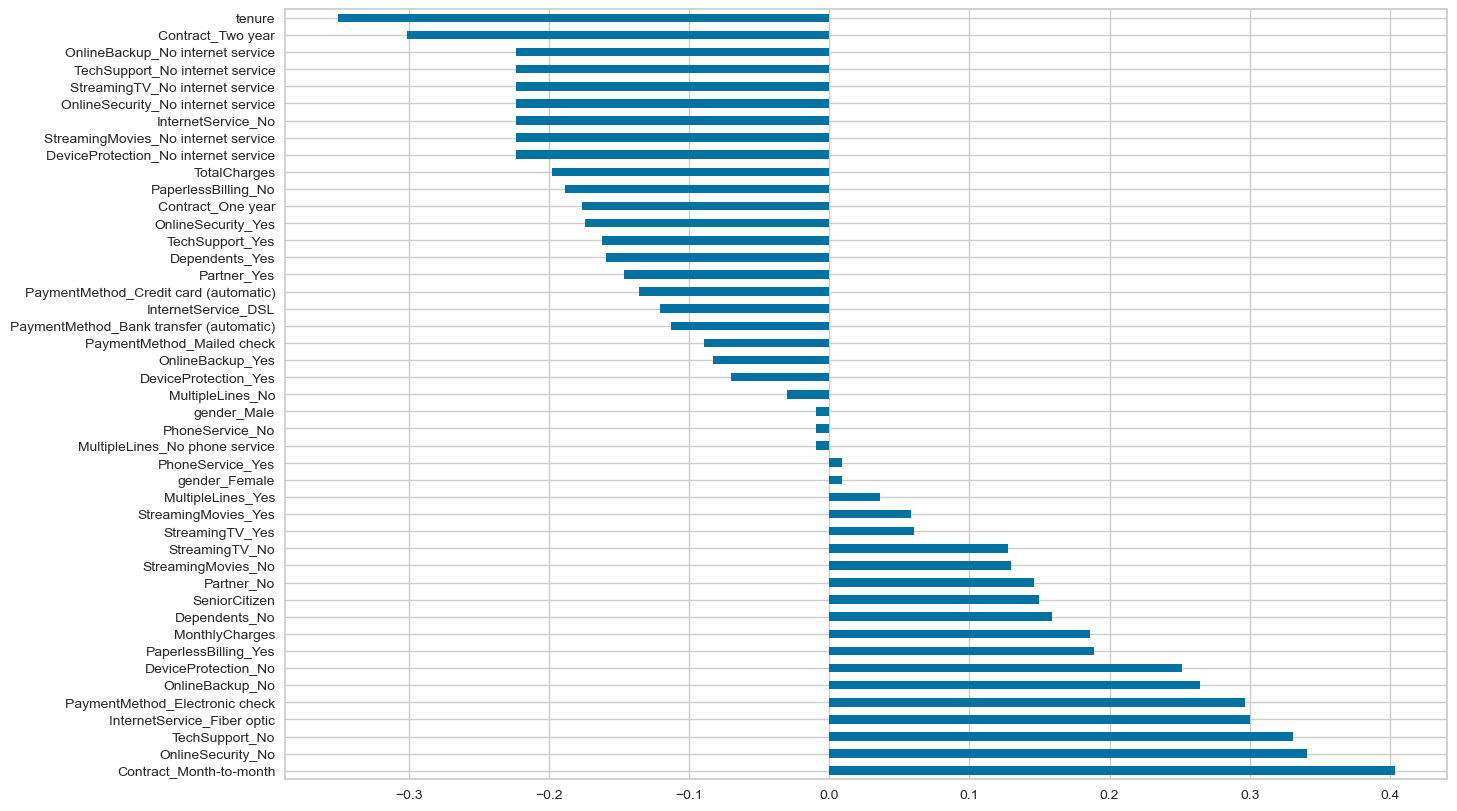

In [20]:
# check correlation
plt.figure(figsize=(15,10))

# plot the correlation between 'Churn' column and the other columns 
correlation = df_dummies.drop('Churn', axis=1).corrwith(df_dummies['Churn']).sort_values(ascending=False)
correlation.plot(kind='barh')
plt.grid()

# df_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='barh')

plt.grid()

## Feature Exploration

## Modelling



In [22]:
X.info()

NameError: name 'X' is not defined

In [32]:
df_clean.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [34]:
df_dummies.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [35]:
# initialise features and target 
X = df_dummies.drop(columns='Churn')
y = df_clean['Churn']

In [36]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4183, 45), (1793, 45), (4183,), (1793,))

In [37]:
clf = setup(data=pd.concat([X_train, y_train], axis=1),
            target = 'Churn',
            session_id=42,
            #normalize=True,
            test_data=pd.concat([X_test, y_test], axis=1),
            n_jobs=-1)

,Description,Value
0,Session id,42
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(5976, 46)"
4,Transformed data shape,"(5976, 46)"
5,Transformed train set shape,"(4183, 46)"
6,Transformed test set shape,"(1793, 46)"
7,Numeric features,45
8,Preprocess,True
9,Imputation type,simple


In [29]:
Best_model = compare_models(fold=3, sort='F1')
Best_model

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6907,0.8134,0.8452,0.4557,0.5921,0.3771,0.4240,0.6767
lr,Logistic Regression,0.8018,0.8383,0.5356,0.6550,0.5892,0.4604,0.4645,1.1500
lda,Linear Discriminant Analysis,0.7956,0.8323,0.5464,0.6335,0.5866,0.4518,0.4541,0.1367
ada,Ada Boost Classifier,0.7985,0.8401,0.5203,0.6509,0.5783,0.4480,0.4529,0.2133
qda,Quadratic Discriminant Analysis,0.6577,0.8148,0.8406,0.4285,0.5665,0.3310,0.3841,0.1367
ridge,Ridge Classifier,0.7980,0.0000,0.4969,0.6585,0.5663,0.4380,0.4454,0.6367
gbc,Gradient Boosting Classifier,0.7958,0.8378,0.4996,0.6510,0.5649,0.4346,0.4413,0.3033
lightgbm,Light Gradient Boosting Machine,0.7853,0.8195,0.5086,0.6159,0.5568,0.4169,0.4205,1.1133
svm,SVM - Linear Kernel,0.7707,0.0000,0.5049,0.5825,0.5376,0.3870,0.3907,0.1400
rf,Random Forest Classifier,0.7803,0.8111,0.4690,0.6130,0.5311,0.3911,0.3972,0.2667


GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression Setup
logi = LogisticRegression(C=1.0, dual=False, fit_intercept=True, intercept_scaling=1, 
                          max_iter=1000, multi_class='auto', penalty='l2', 
                          random_state=42, solver='lbfgs', tol=0.0001, 
                          verbose=0, class_weight='balanced')

# Categorical and Numerical Features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

# Preprocessing Pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='constant', fill_value=0), numerical_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_features)
    ])

# Pipeline with SMOTE and Logistic Regression
pipeline = ImbPipeline([
    ('oversampling', SMOTE()),
    ('preprocessor', preprocessor),
    ('classifier', logi)
])

# Fit the Pipeline
pipeline.fit(X_train, y_train)

# Make Predictions and Evaluate
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.795872838817624
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1317
           1       0.63      0.57      0.60       476

    accuracy                           0.80      1793
   macro avg       0.74      0.72      0.73      1793
weighted avg       0.79      0.80      0.79      1793

[[1156  161]
 [ 205  271]]
